In [1]:
from utils import *
import pandas as pd
import numpy as np

In [2]:
cnt_train = load_product('train', 'COCONUTS')
pnc_train = load_product('train', 'PINA_COLADAS')
cnt_val = load_product('val', 'COCONUTS')
pnc_val = load_product('val', 'PINA_COLADAS')

In [21]:
cnt_train.head()

,timestamp,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,spread,lr,return,return_rank
2,0,-1,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,...,8002.0,107.0,NaN,NaN,8000.0,0.0,2,-0.000063,NaN,NaN
5,100,-1,COCONUTS,7998,187,NaN,NaN,NaN,NaN,8001,...,NaN,NaN,NaN,NaN,7999.5,0.0,3,-0.000125,-0.000062,0.224836
8,200,-1,COCONUTS,7997,191,NaN,NaN,NaN,NaN,8000,...,NaN,NaN,NaN,NaN,7998.5,0.0,3,0.000125,-0.000125,0.092455
14,300,-1,COCONUTS,7998,187,NaN,NaN,NaN,NaN,8001,...,NaN,NaN,NaN,NaN,7999.5,0.0,3,-0.000125,0.000125,0.904345
18,400,-1,COCONUTS,7997,186,NaN,NaN,NaN,NaN,8000,...,NaN,NaN,NaN,NaN,7998.5,0.0,3,-0.000188,-0.000125,0.092455


array([[<Axes: title={'center': 'return'}>]], dtype=object)

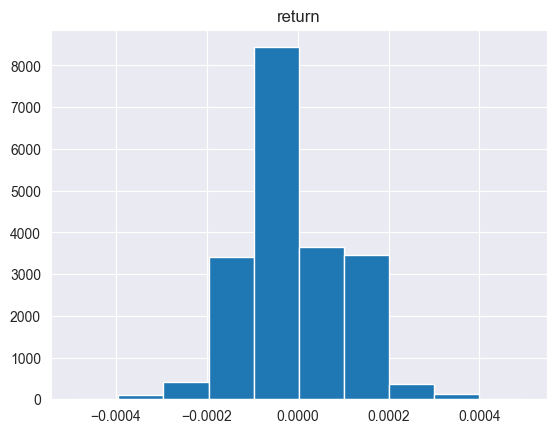

In [3]:
cnt_train['return'] = cnt_train['mid_price'].pct_change()
cnt_train['return_rank'] = cnt_train['return'].rank(pct=True)

array([[<Axes: title={'center': 'return'}>]], dtype=object)

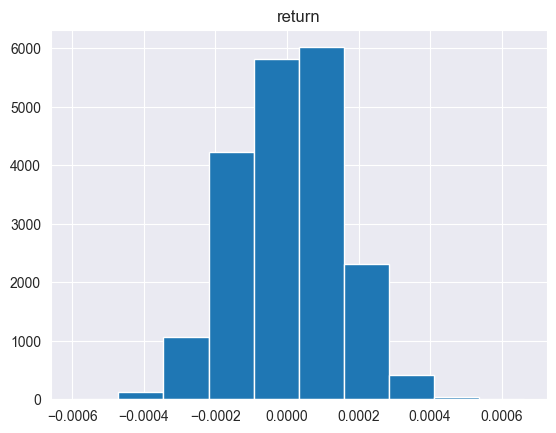

In [4]:
pnc_train['return'] = pnc_train['mid_price'].pct_change()
pnc_train['return_rank'] = pnc_train['return'].rank(pct=True)

In [22]:
cnt_train['norm_price'] = cnt_train['mid_price']/ 8000
pnc_train['norm_price'] = pnc_train['mid_price'] / 15000

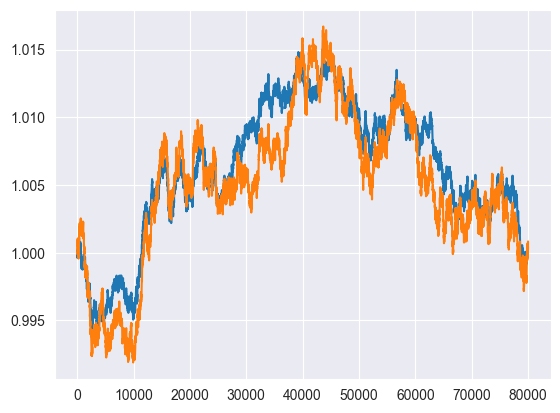

In [26]:
import matplotlib.pyplot as plt
plt.plot(cnt_train['norm_price'])
plt.plot(pnc_train['norm_price'])

(array([ 225.,  742., 2425., 3353., 3756., 3278., 3207., 1982.,  852.,
         180.]),
 array([-0.00370417, -0.00272417, -0.00174417, -0.00076417,  0.00021583,
         0.00119583,  0.00217583,  0.00315583,  0.00413583,  0.00511583,
         0.00609583]),
 <BarContainer object of 10 artists>)

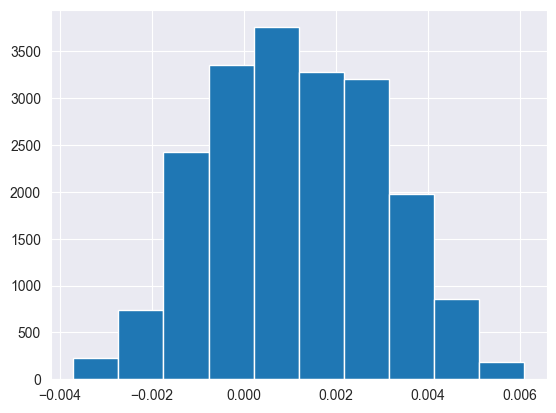

In [31]:
spread = cnt_train['norm_price'].to_numpy() - pnc_train['norm_price'].to_numpy()
plt.hist(spread)

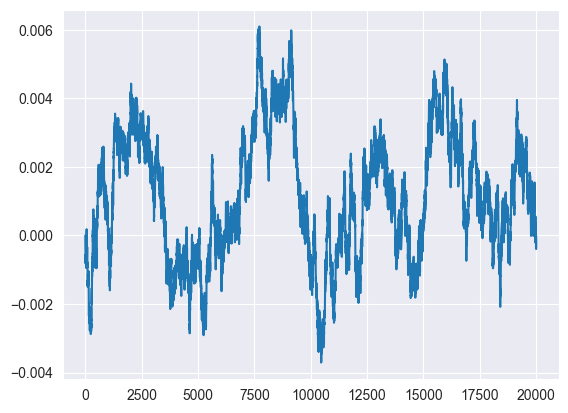

In [32]:
plt.plot(spread)

In [33]:
ratio = cnt_train['mid_price'].to_numpy() / pnc_train['mid_price'].to_numpy()

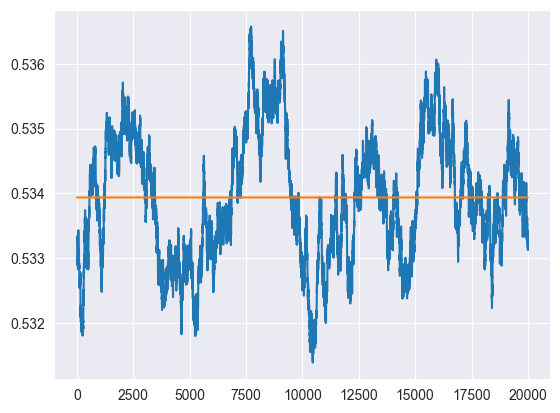

In [36]:
plt.plot(ratio)
plt.plot([np.mean(ratio)] * 20000)